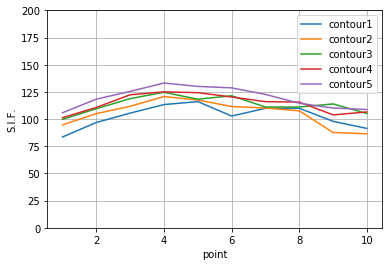

In [1]:
import cv2
import numpy as np
from scipy.spatial.distance import cdist
import pandas as pd
import matplotlib.pyplot as plt
import fuction

read = pd.read_excel('data\distance_angle\input_distance.xlsx')
read2 = pd.read_csv('data/distance_angle/data.csv', encoding = 'ISO-8859-1')
im =np.array(cv2.imread('data/distance_angle/ff000057.jpg', cv2.IMREAD_GRAYSCALE ))/255
crack_tip_loaction = np.array([[207,614]])
data = np.array(read)
tension = np.array(read2)
tension_ml = tension[:,10]
tension_stress= tension[:,11]
ratio = 2/70*0.001 #70픽셀당 2mm , mm to m

distance=[]
Ml_intencity=[]
stress = []
K= []


for i in data:
    theta=i[4]
    calculater_location = np.array([[i[2],i[3]]])
    distance_value = cdist(calculater_location, crack_tip_loaction)*ratio
    distance = np.append(distance, distance_value)
    value = np.average(im[int(i[2]):int(i[2]+2),int(i[3]):int(i[3])+2])
    idx = (np.abs(tension_ml-value)).argmin()
    stress_value = tension_stress[idx]
    stress = np.append(stress,stress_value)
    Ml_intencity = np.append(Ml_intencity, value)
    k = fuction.K_deviator(stress_value, distance_value,theta*np.pi/180)
    K= np.append(K,k)

#graph part
fig, ax1 = plt.subplots()
line1 = ax1.plot(data[0:10,1],K[0:10], label="contour1")
line2 = ax1.plot(data[10:20,1],K[10:20], label="contour2")
line3 = ax1.plot(data[20:30,1],K[20:30], label="contour3")
line4 = ax1.plot(data[30:40,1],K[30:40], label="contour4")
line5 = ax1.plot(data[40:50,1],K[40:50], label="contour5")
lines = line1 + line2 + line3 + line4 + line5
labels = [l.get_label() for l in lines]
plt.grid()
plt.legend(lines, labels, loc=0)
plt.ylim(0,200)
plt.xlabel('point')
plt.ylabel('S.I.F.')
plt.savefig('data/distance_angle/k그래프.png')
plt.show()

data_union = {'Contour N.o.': data[:,0], 'point': data[:,1],
              'location_y': data[:,2], 'location_x': data[:,3],
              'theta': data[:,4], 'distance':distance,
              'ml_intencity':Ml_intencity, 'Stress':stress, 'K':K}
df = pd.DataFrame(data_union)
df.to_excel('data\distance_angle\output_distance.xlsx')



In [1]:
#최소자승법
import cv2
import numpy as np


a = np.linspace(0,2000,2001, dtype=int)*0.1
l_s_m = []
for i in a:
    x = np.sum(np.power((K[40:50]-i),2))

    l_s_m = np.append(l_s_m,x)

l_s_m_index = l_s_m.argmin()
print(a[l_s_m_index])

NameError: name 'K' is not defined

In [8]:
import cv2
import numpy as np
import pandas as pd


def mouse_callback(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        points.append([x,y])
        print("마우스 이벤트발생, x:", x, "y", y)


img = np.zeros((100,50))+0.5

cv2.namedWindow('image')
cv2.setMouseCallback('image', mouse_callback)

points = []
x=[]
y=[]
number = []
num=9

while(True):

    cv2.imshow('image', img)

    k=cv2.waitKey(1)&0xFF
    if k == 27:
        for i in points:
            num += 1
            number = np.append(number, num)
            x = np.append(x, i[0])
            y = np.append(y, i[1])


        break


data_union = {'Contour N.o.': number, 'x': x, 'y' :y}
df = pd.DataFrame(data_union)
df.to_excel('연습용.xlsx')
cv2.destroyAllWindows()